<a href="https://colab.research.google.com/github/mereetmoner/Brain-Tumor/blob/main/brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [ ]:
classes = os.listdir('/content/drive/MyDrive/Brain-Tumor/Training')


In [ ]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]])
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]

In [ ]:
trainData = []
trainLabel = []
dim = (150, 150)
trainPath ="/content/drive/MyDrive/Brain-Tumor/Training"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1

trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(2870, 4)
print(trainData.shape)
print(trainLabel.shape)

pituitary_tumor
pituitary_tumor
meningioma_tumor
meningioma_tumor
no_tumor
no_tumor
glioma_tumor
glioma_tumor
(2870, 150, 150, 3)
(2870, 4)


In [ ]:
testData = []
testLabel = []
dim = (150, 150)
testPath ="/content/drive/MyDrive/Brain-Tumor/Testing"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(394, 4)
print(testData.shape)
print(testLabel.shape)

pituitary_tumor
meningioma_tumor
meningioma_tumor
pituitary_tumor
no_tumor
no_tumor
glioma_tumor
glioma_tumor
(394, 150, 150, 3)
(394, 4)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [ ]:
history = model.fit(trainData, trainLabel,batch_size = 32, epochs =20, verbose=1,validation_data=(testData, testLabel))

Epoch 1/20
90/90 [==============================] - 91s 972ms/step - loss: 15.7607 - accuracy: 0.4735 - val_loss: 1.9436 - val_accuracy: 0.2792
Epoch 2/20
90/90 [==============================] - 72s 799ms/step - loss: 0.6364 - accuracy: 0.7258 - val_loss: 2.4109 - val_accuracy: 0.3198
Epoch 3/20
90/90 [==============================] - 72s 797ms/step - loss: 0.4386 - accuracy: 0.8150 - val_loss: 2.9447 - val_accuracy: 0.3376
Epoch 4/20
90/90 [==============================] - 83s 920ms/step - loss: 0.3520 - accuracy: 0.8547 - val_loss: 4.2769 - val_accuracy: 0.3376
Epoch 5/20
90/90 [==============================] - 71s 794ms/step - loss: 0.2525 - accuracy: 0.8944 - val_loss: 4.5814 - val_accuracy: 0.3401
Epoch 6/20
90/90 [==============================] - 69s 769ms/step - loss: 0.2121 - accuracy: 0.9073 - val_loss: 5.6122 - val_accuracy: 0.3604
Epoch 7/20
90/90 [==============================] - 75s 830ms/step - loss: 0.1990 - accuracy: 0.9206 - val_loss: 6.0975 - val_accuracy: 0.357

In [ ]:
model.save("Brain-Tumor-model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


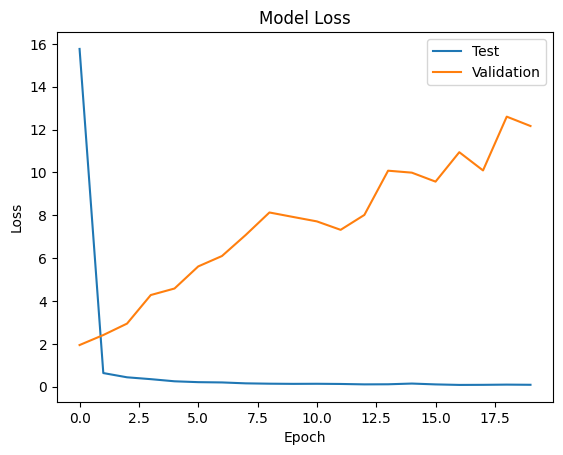

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

99.99208450317383% Confidence This Is no_tumor


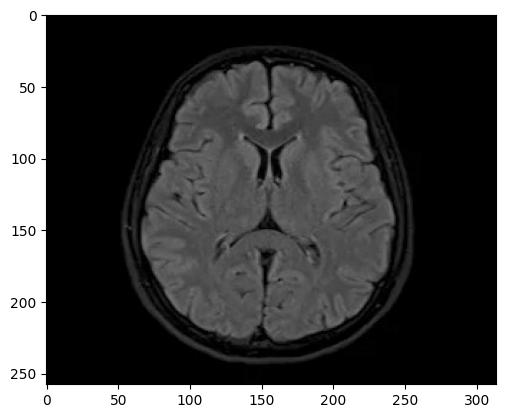

In [ ]:
img = Image.open('/content/drive/MyDrive/Brain-Tumor/Testing/no_tumor/image(100).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99995231628418% Confidence This Is meningioma_tumor


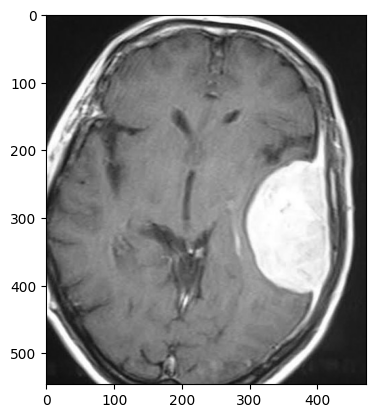

In [ ]:
img = Image.open('/content/drive/MyDrive/Brain-Tumor/Testing/meningioma_tumor/image(120).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))